In [2]:
import pandas as pd

# Load CSV data

df = pd.read_csv('data/final_merged_dataframe.csv', dtype={6: str})

# Preview the first few rows of your data
print(df.head())

  ISO-alpha3 Code  Year Parity_Indicator_Code  Parity_Value  Keyword Count  \
0             DZA  2020               Primary         0.969              1   
1             DZA  2020               Primary         0.969              1   
2             DZA  2020               Primary         0.969              1   
3             DZA  2020               Primary         0.969              1   
4             DZA  2020               Primary         0.969              1   

   Sentiment Score                                      Relevant Text  \
0              0.0  Algerian women took part in the national revol...   
1              0.0  Algerian women took part in the national revol...   
2              0.0  Algerian women took part in the national revol...   
3              0.0  Algerian women took part in the national revol...   
4              0.0  Algerian women took part in the national revol...   

  Years with Highest Keyword Count Years with Most Positive Sentiment  \
0                  

In [3]:
# Check data types
print(df.dtypes)

# Convert columns
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Mentions'] = pd.to_numeric(df['Keyword Count'], errors='coerce')
df['Sentiment Score'] = pd.to_numeric(df['Sentiment Score'], errors='coerce')

# For any columns that need to be categorical
df['Country Name'] = df['Country Name'].astype('category')


ISO-alpha3 Code                                    object
Year                                                int64
Parity_Indicator_Code                              object
Parity_Value                                      float64
Keyword Count                                       int64
Sentiment Score                                   float64
Relevant Text                                      object
Years with Highest Keyword Count                   object
Years with Most Positive Sentiment                 object
Country Name                                       object
Literacy_Indicator_Code                            object
Children Out of School (%)                        float64
Expected Years of Schooling                       float64
Expected Years of Schooling (Female)              float64
Expected Years of Schooling (Male)                float64
Government Expenditure on Education (% of GDP)    float64
Lower Secondary Completion Rate (Female)          float64
Lower Secondar

In [4]:
duplicates = df[df.duplicated(subset=['Country Name', 'Year'], keep=False)]
print(duplicates)


        ISO-alpha3 Code  Year Parity_Indicator_Code  Parity_Value  \
0                   DZA  2020               Primary         0.969   
1                   DZA  2020               Primary         0.969   
2                   DZA  2020               Primary         0.969   
3                   DZA  2020               Primary         0.969   
4                   DZA  2020               Primary         0.969   
...                 ...   ...                   ...           ...   
2954790             URY  1982              Tertiary         1.019   
2954791             URY  1982              Tertiary         1.019   
2954792             URY  1982              Tertiary         1.019   
2954793             URY  1982              Tertiary         1.019   
2954794             URY  1982              Tertiary         1.019   

         Keyword Count  Sentiment Score  \
0                    1            0.000   
1                    1            0.000   
2                    1            0.000   

In [5]:
# Drop duplicates based on key columns (e.g., Country Name, Year, and Keyword Count)
df_cleaned = df.drop_duplicates(subset=['Country Name', 'Year', 'Keyword Count'])
df_cleaned

,ISO-alpha3 Code,Year,Parity_Indicator_Code,Parity_Value,Keyword Count,Sentiment Score,Relevant Text,Years with Highest Keyword Count,Years with Most Positive Sentiment,Country Name,...,School Enrollment (Primary) Gross,"School Enrollment (Primary, Female) Gross","School Enrollment (Primary, Male) Gross",School Enrollment (Secondary) Gross,"School Enrollment (Secondary, Female) Gross","School Enrollment (Secondary, Male) Gross",School Enrollment (Tertiary) Gross,"School Enrollment (Tertiary, Female) Gross","School Enrollment (Tertiary, Male) Gross",Mentions
0,DZA,2020,Primary,0.969,1,0.000,Algerian women took part in the national revol...,[2023],[2018],Algeria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
724,DZA,2019,Primary,0.958,1,0.000,"Poverty eradication, quality education, climat...",[2023],[2018],Algeria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1448,DZA,2018,Primary,0.955,2,0.211,Those unifying ideals are considered above all...,[2023],[2018],Algeria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2172,DZA,2017,Primary,0.951,6,0.167,Having realized the need to enhance the rights...,[2023],[2018],Algeria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
2896,DZA,2016,Primary,0.950,1,0.200,"Under the strong leadership of its President, ...",[2023],[2018],Algeria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2953131,URY,1972,Primary,0.999,0,0.000,NaN,[2019],[1977],Uruguay,...,114.343651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2953547,URY,1971,Primary,1.000,0,0.000,NaN,[2019],[1977],Uruguay,...,114.343651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2953963,URY,1970,Primary,0.950,1,0.155,The Government of Uruguay has expressed in oth...,[2019],[1977],Uruguay,...,114.343651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2954379,URY,2021,Tertiary,1.442,1,0.148,We should acknowledge the outstanding work of ...,[2019],[1977],Uruguay,...,114.343651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [6]:
# Check column data types
print(df_cleaned.dtypes)

# Correct data types where necessary
df_cleaned['Keyword Count'] = pd.to_numeric(df_cleaned['Keyword Count'], errors='coerce')
df_cleaned['Year'] = pd.to_numeric(df['Year'], errors='coerce')


ISO-alpha3 Code                                     object
Year                                                 int64
Parity_Indicator_Code                               object
Parity_Value                                       float64
Keyword Count                                        int64
Sentiment Score                                    float64
Relevant Text                                       object
Years with Highest Keyword Count                    object
Years with Most Positive Sentiment                  object
Country Name                                      category
Literacy_Indicator_Code                             object
Children Out of School (%)                         float64
Expected Years of Schooling                        float64
Expected Years of Schooling (Female)               float64
Expected Years of Schooling (Male)                 float64
Government Expenditure on Education (% of GDP)     float64
Lower Secondary Completion Rate (Female)           float

C:\Users\Jan\AppData\Local\Temp\ipykernel_15128\44681412.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Keyword Count'] = pd.to_numeric(df_cleaned['Keyword Count'], errors='coerce')
C:\Users\Jan\AppData\Local\Temp\ipykernel_15128\44681412.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = pd.to_numeric(df['Year'], errors='coerce')


In [7]:
# Check all column names
print(df_cleaned.columns)



Index(['ISO-alpha3 Code', 'Year', 'Parity_Indicator_Code', 'Parity_Value',
       'Keyword Count', 'Sentiment Score', 'Relevant Text',
       'Years with Highest Keyword Count',
       'Years with Most Positive Sentiment', 'Country Name',
       'Literacy_Indicator_Code', 'Children Out of School (%)',
       'Expected Years of Schooling', 'Expected Years of Schooling (Female)',
       'Expected Years of Schooling (Male)',
       'Government Expenditure on Education (% of GDP)',
       'Lower Secondary Completion Rate (Female)',
       'Lower Secondary Completion Rate (Male)',
       'Lower Secondary Completion Rate (Total)',
       'Primary Completion Rate (Female)', 'Primary Completion Rate (Male)',
       'Primary Completion Rate (Total)',
       'School Enrollment (Preprimary) Gross',
       'School Enrollment (Preprimary, Female) Gross',
       'School Enrollment (Preprimary, Male) Gross',
       'School Enrollment (Primary) Gross',
       'School Enrollment (Primary, Female) Gross

In [9]:
# Reload the full CSV without filters
df_cleaned = pd.read_csv('data/final_merged_dataframe.csv', low_memory=False)

# Print the first few rows to see all columns
print(df_cleaned.head())

# Print the column names to confirm all columns are present
print(df_cleaned.columns)


  ISO-alpha3 Code  Year Parity_Indicator_Code  Parity_Value  Keyword Count  \
0             DZA  2020               Primary         0.969              1   
1             DZA  2020               Primary         0.969              1   
2             DZA  2020               Primary         0.969              1   
3             DZA  2020               Primary         0.969              1   
4             DZA  2020               Primary         0.969              1   

   Sentiment Score                                      Relevant Text  \
0              0.0  Algerian women took part in the national revol...   
1              0.0  Algerian women took part in the national revol...   
2              0.0  Algerian women took part in the national revol...   
3              0.0  Algerian women took part in the national revol...   
4              0.0  Algerian women took part in the national revol...   

  Years with Highest Keyword Count Years with Most Positive Sentiment  \
0                  

In [10]:
# Convert 'Year' to numeric
df_cleaned['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Convert 'Keyword Count' to numeric
df_cleaned['Keyword Count'] = pd.to_numeric(df_cleaned['Keyword Count'], errors='coerce')

# Convert 'Sentiment Score' to numeric
df_cleaned['Sentiment Score'] = pd.to_numeric(df_cleaned['Sentiment Score'], errors='coerce')

# If 'Country Name' needs to be categorical
df_cleaned['Country Name'] = df_cleaned['Country Name'].astype('category')

# Ensure 'Parity_Value' is numeric
df_cleaned['Parity_Value'] = pd.to_numeric(df_cleaned['Parity_Value'], errors='coerce')



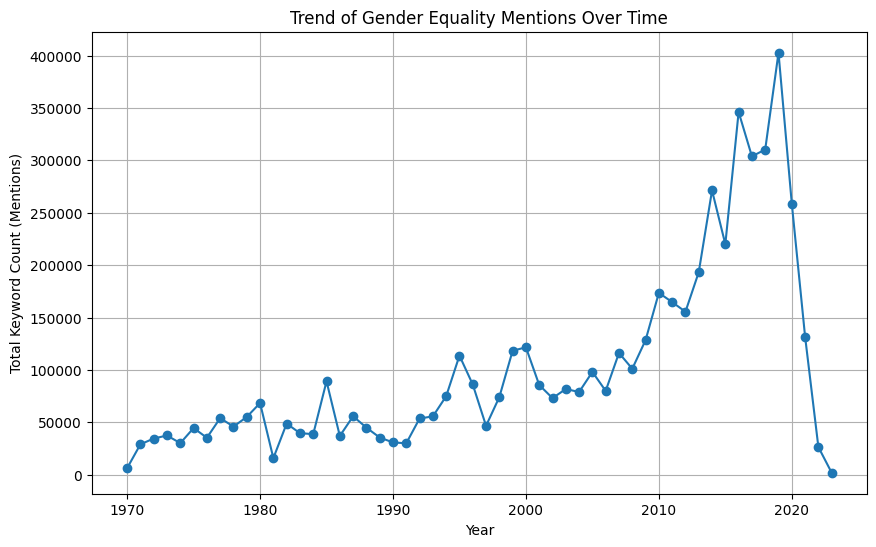

In [11]:
import matplotlib.pyplot as plt

# Group by Year and sum the 'Keyword Count' to see how mentions evolve over time
yearly_mentions = df.groupby('Year')['Keyword Count'].sum().reset_index()

# Plot the line chart
plt.figure(figsize=(10,6))
plt.plot(yearly_mentions['Year'], yearly_mentions['Keyword Count'], marker='o')
plt.title('Trend of Gender Equality Mentions Over Time')
plt.xlabel('Year')
plt.ylabel('Total Keyword Count (Mentions)')
plt.grid(True)
plt.show()


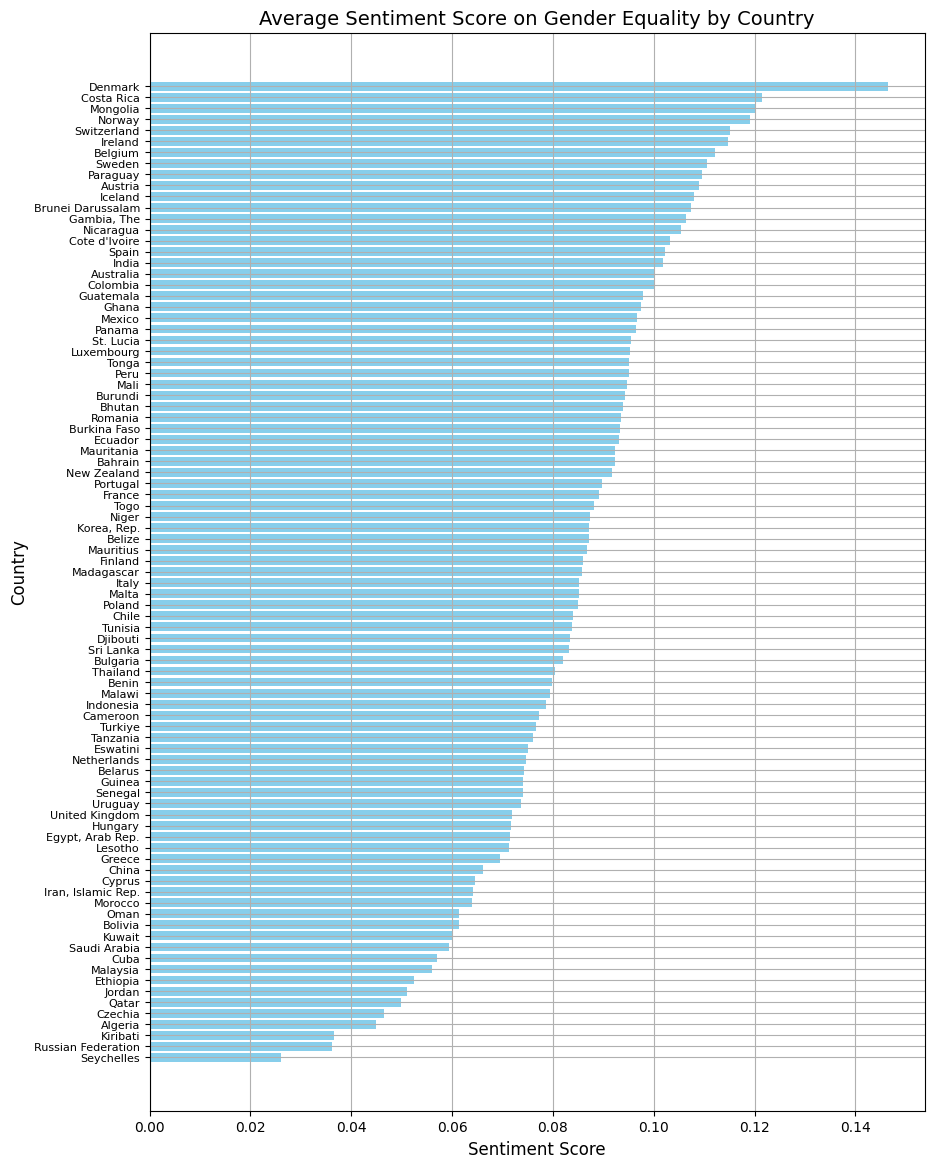

In [12]:
# Group by 'Country Name' and calculate the average sentiment score per country with observed=True
country_sentiment = df_cleaned.groupby('Country Name', observed=True)['Sentiment Score'].mean().reset_index()

# Sort the countries by sentiment score for better visualization
country_sentiment.sort_values(by='Sentiment Score', inplace=True)

# Plot the bar chart with an adjusted figure size and font size
plt.figure(figsize=(10, 14))  # Increase height to make space for country names
plt.barh(country_sentiment['Country Name'], country_sentiment['Sentiment Score'], color='skyblue')

# Add labels and title
plt.title('Average Sentiment Score on Gender Equality by Country', fontsize=14)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Adjust the y-axis labels to a smaller font and rotation for better readability
plt.yticks(fontsize=8)  # Smaller font for y-axis labels

# Show grid and plot
plt.grid(True)
plt.show()



In [13]:
# Create a pivot table with observed=False to silence the warning
heatmap_data = df_cleaned.pivot_table(values='Keyword Count', 
                              index='Country Name', 
                              columns='Year', 
                              aggfunc='sum', 
                              fill_value=0, 
                              observed=False)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Blues', linewidths=0.5, annot=False)

# Adding labels and title
plt.title('Heatmap of Mentions of Gender Equality in Education by Country and Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()




NameError: name 'sns' is not defined

<Figure size 1200x800 with 0 Axes>

In [153]:
print(df_cleaned.columns)



Index(['ISO-alpha3 Code', 'Year', 'Parity_Indicator_Code', 'Parity_Value',
       'Keyword Count', 'Sentiment Score', 'Relevant Text',
       'Years with Highest Keyword Count',
       'Years with Most Positive Sentiment', 'Country Name',
       'Literacy_Indicator_Code', 'Children Out of School (%)',
       'Expected Years of Schooling', 'Expected Years of Schooling (Female)',
       'Expected Years of Schooling (Male)',
       'Government Expenditure on Education (% of GDP)',
       'Lower Secondary Completion Rate (Female)',
       'Lower Secondary Completion Rate (Male)',
       'Lower Secondary Completion Rate (Total)',
       'Primary Completion Rate (Female)', 'Primary Completion Rate (Male)',
       'Primary Completion Rate (Total)',
       'School Enrollment (Preprimary) Gross',
       'School Enrollment (Preprimary, Female) Gross',
       'School Enrollment (Preprimary, Male) Gross',
       'School Enrollment (Primary) Gross',
       'School Enrollment (Primary, Female) Gross

In [14]:
correlation = df_cleaned['School Enrollment (Primary, Female) Gross'].corr(df_cleaned['Keyword Count'])
print(f'Correlation: {correlation}')



Correlation: 0.026340358430101216


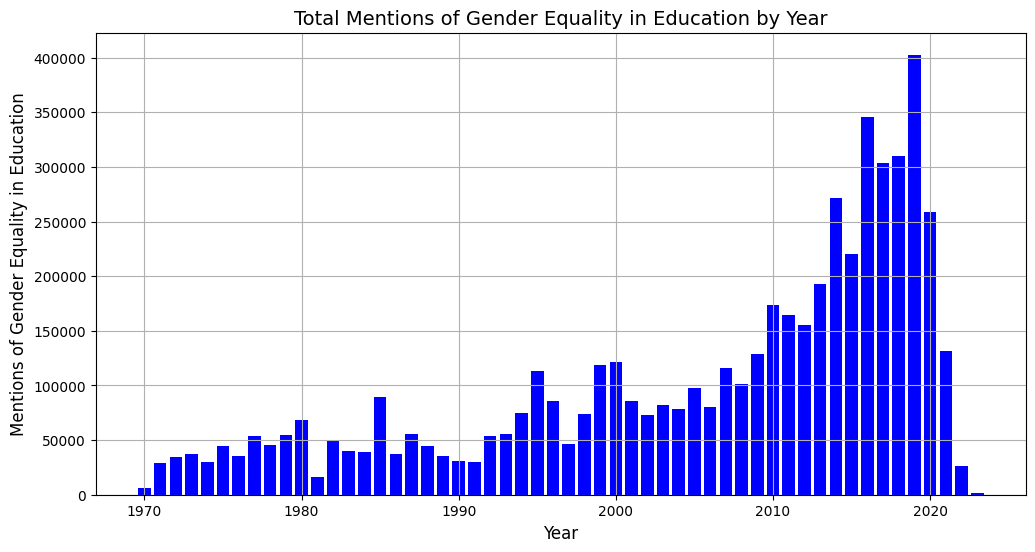

In [15]:
# Create a bar chart to show the sum of mentions by year
plt.figure(figsize=(12, 6))
plt.bar(yearly_mentions['Year'], yearly_mentions['Keyword Count'], color='blue')

# Titles and labels
plt.title('Total Mentions of Gender Equality in Education by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mentions of Gender Equality in Education', fontsize=12)
plt.grid(True)
plt.show()




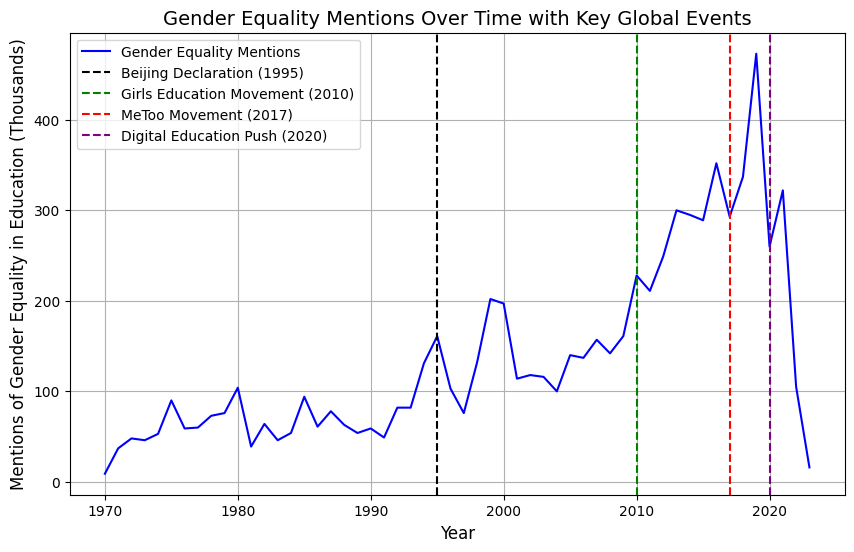

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Remove duplicates to avoid inflated counts
# Drop duplicates based on the combination of 'Country Name', 'Year', and 'Keyword Count'
df_cleaned = df.drop_duplicates(subset=['Country Name', 'Year', 'Keyword Count'])

# Step 2: Group by 'Year' and sum the 'Keyword Count' to see how mentions evolve over time
yearly_mentions = df_cleaned.groupby('Year')['Keyword Count'].sum().reset_index()

# Step 3: Create a line plot for the yearly mentions 
plt.figure(figsize=(10, 6))
plt.plot(yearly_mentions['Year'], yearly_mentions['Keyword Count'], color='blue', label='Gender Equality Mentions')

# Step 4: Add vertical lines for the events
plt.axvline(x=1995, color='black', linestyle='--', label='Beijing Declaration (1995)')
plt.axvline(x=2010, color='green', linestyle='--', label='Girls Education Movement (2010)')
plt.axvline(x=2017, color='red', linestyle='--', label='MeToo Movement (2017)')
plt.axvline(x=2020, color='purple', linestyle='--', label='Digital Education Push (2020)')

# Step 5: Add titles and labels for clarity
plt.title('Gender Equality Mentions Over Time with Key Global Events', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mentions of Gender Equality in Education (Thousands)', fontsize=12)
plt.grid(True)
plt.legend(loc='upper left')
plt.show()


In [17]:
print(yearly_mentions.describe())


              Year  Keyword Count
count    54.000000      54.000000
mean   1996.500000     136.981481
std      15.732133     102.117670
min    1970.000000       9.000000
25%    1983.250000      60.250000
50%    1996.500000     103.500000
75%    2009.750000     188.000000
max    2023.000000     473.000000


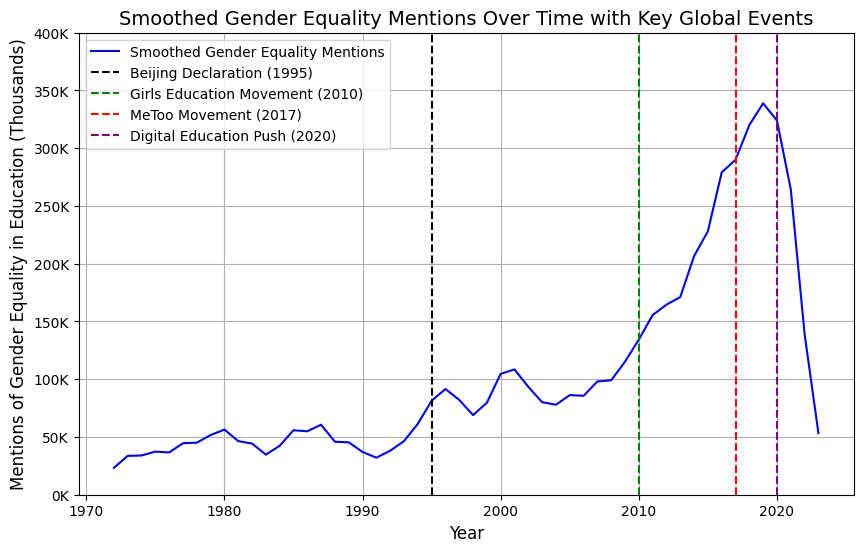

In [18]:
# Sample data
yearly_mentions = df.groupby('Year')['Keyword Count'].sum().reset_index()

# Apply a moving average to smooth the trend (window size of 3 years)
yearly_mentions['Smoothed Mentions'] = yearly_mentions['Keyword Count'].rolling(window=3).mean()

# Create a line plot for the smoothed mentions, scaling down by 1000
plt.figure(figsize=(10, 6))
plt.plot(yearly_mentions['Year'], yearly_mentions['Smoothed Mentions'] / 1000, color='blue', label='Smoothed Gender Equality Mentions')

# Add vertical lines for the events
plt.axvline(x=1995, color='black', linestyle='--', label='Beijing Declaration (1995)')
plt.axvline(x=2010, color='green', linestyle='--', label='Girls Education Movement (2010)')
plt.axvline(x=2017, color='red', linestyle='--', label='MeToo Movement (2017)')
plt.axvline(x=2020, color='purple', linestyle='--', label='Digital Education Push (2020)')

# Titles and labels with improved clarity
plt.title('Smoothed Gender Equality Mentions Over Time with Key Global Events', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mentions of Gender Equality in Education (Thousands)', fontsize=12)

# Adjust the y-axis tick formatting to show thousands
plt.yticks(ticks=plt.yticks()[0], labels=[f'{int(x)}K' for x in plt.yticks()[0]])

plt.grid(True)
plt.legend(loc='upper left')
plt.show()


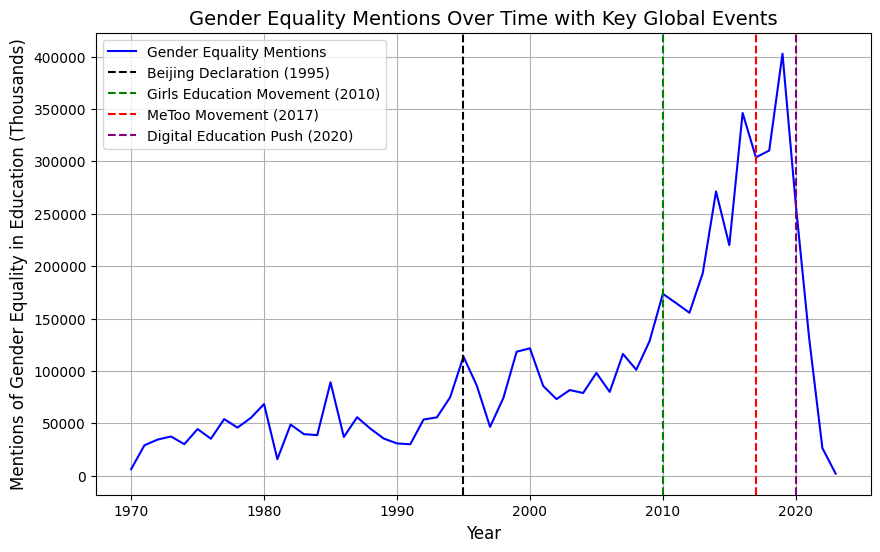

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by 'Year' and sum the 'Keyword Count' to see how mentions evolve over time
yearly_mentions = df.groupby('Year')['Keyword Count'].sum().reset_index()

# Create a line plot for the mentions without smoothing
plt.figure(figsize=(10, 6))
plt.plot(yearly_mentions['Year'], yearly_mentions['Keyword Count'], color='blue', label='Gender Equality Mentions')

# Add vertical lines for the events
plt.axvline(x=1995, color='black', linestyle='--', label='Beijing Declaration (1995)')
plt.axvline(x=2010, color='green', linestyle='--', label='Girls Education Movement (2010)')
plt.axvline(x=2017, color='red', linestyle='--', label='MeToo Movement (2017)')
plt.axvline(x=2020, color='purple', linestyle='--', label='Digital Education Push (2020)')

# Titles and labels 
plt.title('Gender Equality Mentions Over Time with Key Global Events', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mentions of Gender Equality in Education (Thousands)', fontsize=12)
plt.grid(True)
plt.legend(loc='upper left')
plt.show()


In [31]:
#Step 1: Remove duplicates based on 'Country Name', 'Year', and 'Keyword Count' to avoid duplicate counts
count_test = df.drop_duplicates(subset=['Country Name', 'Year', 'Keyword Count'])[["Year", "Country Name", "Keyword Count"]]
count_test.describe()

,Year,Keyword Count
count,4102.000000,4102.000000
mean,1997.277182,1.803267
std,14.798441,3.003949
min,1970.000000,0.000000
25%,1985.000000,0.000000
50%,1998.000000,1.000000
75%,2010.000000,2.000000
max,2023.000000,38.000000


C:\Users\Jan\AppData\Local\Temp\ipykernel_15128\3164412005.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_year_mentions = count_test.groupby(['Country Name', 'Year'])['Keyword Count'].mean().reset_index()


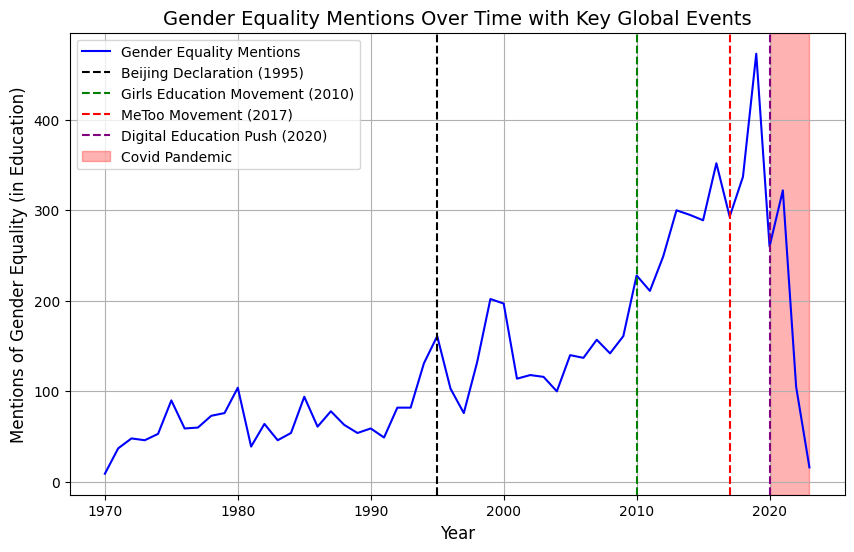

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 2: Group by both 'Country Name' and 'Year' and calculate the **mean** keyword mentions for each country-year
# This avoids summing multiple rows for the same country/year, which could inflate counts
country_year_mentions = count_test.groupby(['Country Name', 'Year'])['Keyword Count'].mean().reset_index()

# Step 3: Sum the mentions by year across all countries to get yearly totals
yearly_mentions = country_year_mentions.groupby('Year')['Keyword Count'].sum().reset_index()

# Step 4: Create a line plot for the yearly mentions
plt.figure(figsize=(10, 6))
plt.plot(yearly_mentions['Year'], yearly_mentions['Keyword Count'], color='blue', label='Gender Equality Mentions')

# Step 5: Add vertical lines for key events
plt.axvline(x=1995, color='black', linestyle='--', label='Beijing Declaration (1995)')
plt.axvline(x=2010, color='green', linestyle='--', label='Girls Education Movement (2010)')
plt.axvline(x=2017, color='red', linestyle='--', label='MeToo Movement (2017)')
plt.axvline(x=2020, color='purple', linestyle='--', label='Digital Education Push (2020)')

# Highlight the area starting from 2020
plt.axvspan(2020, yearly_mentions['Year'].max(), color='red', alpha=0.3, label='Covid Pandemic')

# Step 6: Add titles and labels for clarity
plt.title('Gender Equality Mentions Over Time with Key Global Events', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mentions of Gender Equality (in Education)', fontsize=12)
plt.grid(True)
plt.legend(loc='upper left')
plt.show()
